In [1]:
# Notebook Summary:

# V.History: 
# Date Last Modified: 14 May 2025

# This notebook uses the KMeans++ ML model, an advanced clustering algorithm, to cluster chemicals (Determinand) based on word embeddings 
# created using ChemBERTa, an LLM-based chemical NLP model. 
# It takes chemical names obtained from the EDA process and applies advanced techniques for better clustering.

#Pre-Requisite : 
    #Kernel Python 3 (ipykernel) is required to run this notebook 
    #Required python version - Python 3.10.15 and its compatible Numpy , ScikitLearn libraries

#Old Name: 09_NB_chemBERT3_Cluster.ipynb

#Developer note: Chemical_Names obtained from either 04_nb_extract_chem_name.ipynb <<or 06_nb_final_chem2.ipynb>>)
#input file : 04_nb_extract_chem_name.csv

In [2]:
#Check python version compatibility 3.10 or above is required
!python -V
python_version=!(python --version 2>&1)
print (python_version)

Python 3.10.15
['Python 3.10.15']


In [3]:
    '''
    Literature review ChemBERTa
    '''
    
    '''
    Both ChemBERTa and BERT are examples of Large Language Models (LLMs) within the broader field of Natural Language Processing (NLP).
    '''

    '''
    LLMs:
    BERT and ChemBERTa are large neural networks designed to process and generate human-like text. They are trained on massive 
    datasets and excel at understanding and generating language. 
    '''

    '''
    NLP:
    Natural Language Processing is the field of computer science that focuses on enabling computers to understand, interpret, 
    and generate human language. 
    '''

    '''
    BERT:
    BERT, which stands for Bidirectional Encoder Representations from Transformers, is a specific type of LLM developed by Google. 
    It is known for its ability to understand the context of words in a sentence and has been widely used in various NLP tasks. 
    '''

    '''
    ChemBERTa:
    ChemBERTa is a specialized version of BERT, designed specifically for tasks related to chemistry and molecular properties. 
    It leverages the principles of BERT but is trained on a dataset of chemical structures and properties, according to a study 
    published in arXiv (https://arxiv.org/pdf/2209.01712). 
    '''

'\nChemBERTa:\nChemBERTa is a specialized version of BERT, designed specifically for tasks related to chemistry and molecular properties. \nIt leverages the principles of BERT but is trained on a dataset of chemical structures and properties, according to a study \npublished in arXiv (https://arxiv.org/pdf/2209.01712). \n'

In [4]:
    '''
    Literature review KMeans++
    '''
    
    '''
    K-means++ is an improved version of the K-means clustering algorithm, addressing the issue of random centroid initialization 
    in the original K-means. Research focuses on its advantages in faster convergence and improved cluster quality compared to 
    the standard K-means. A key area of exploration is its effectiveness in various domains and the comparison of K-means++ with 
    other clustering algorithms. 
    '''

    '''
    Literature Review Highlights:

    Problem:
    The traditional K-means algorithm's performance can be heavily influenced by the initial placement of cluster centroids, 
    leading to suboptimal clustering results. 

    Solution:
    K-means++ addresses this by implementing a more sophisticated centroid initialization strategy, aiming to spread out the initial centroids 
    more effectively across the dataset. 
    
    Advantages:
    Faster Convergence: K-means++ typically converges faster than the standard K-means due to its better initial centroid placement. 
    Improved Cluster Quality: By avoiding clustering variations caused by poor initializations, K-means++ generally leads to more robust 
    and representative cluster assignments. 
    
    Research Areas:
    Comparison with K-means: Studies often compare K-means++'s performance against the standard K-means algorithm, highlighting 
    its improvements in various scenarios. 
    
    Applications: Research explores the use of K-means++ in different domains, including data mining, image segmentation, and market segmentation. 
    
    Algorithm Enhancements: Some research focuses on further enhancing the K-means++ algorithm, such as optimizing the centroid 
    initialization process or incorporating more robust distance metrics. 
    
    Key Concepts:
    Centroid Initialization: K-means++'s core improvement lies in its method for initializing cluster centers, which aims to spread out 
    the initial centroids more evenly across the data. 
    
    Distance Metrics: Different distance metrics can be used to measure the similarity between data points, influencing the clustering results. 
    
    Cluster Evaluation: Various metrics are used to evaluate the quality of the clusters produced by K-means++, including the within-cluster 
    sum of squares and silhouette score. 

    In summary, K-means++ is a well-established and widely studied improvement to the K-means algorithm, offering advantages 
    in terms of convergence speed and cluster quality. Research continues to explore its applications and potential enhancements, 
    demonstrating its ongoing relevance in data analysis and machine learning
    '''

    '''
    KMeans++ review ends
    '''


'\nKMeans++ review ends\n'

In [5]:
#Begin CARDS
#Chemicals Clustering using Large Language Models based Natural Language Processing Libraries

################################################################################################################
#chemBERTa-3 LLM 
#Reference Sample 
#  https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Transfer_Learning_With_ChemBERTa_Transformers.ipynb
#  Reference Guidlines at
#    https://github.com/seyonechithranaonda/bert-loves-chemistry
################################################################################################################

In [6]:
%run "..//99_Common_Utils/99_NB_CommonUtils.ipynb" #Library Declaration section - Installing or Initiating all required Python Libraries

Intalling required libraries and utilities.....
Uses Python 3 (ipykernel) (Local)
Python 3.10.15
['Python 3.10.15']

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip in

2025-06-02 16:18:28.696418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748881108.719639 1306706 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748881108.727053 1306706 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748881108.746186 1306706 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748881108.746207 1306706 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748881108.746209 1306706 computation_placer.cc:177] computation placer alr


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
|| Completed intalling required libraries and utilities ||

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#Load input data
df = pd.DataFrame()
raw = 'raw/'
curated = "curated/"
cleansed = "cleansed/"

folderpath = cleansed
#filename = '08_F_CSV_ChemNameExtraction.csv'           #Commented on 10 May 2025
#filename = '10_F_CSV_chem2_NameExtraction_2Lila.csv'   #Commented on 10 May 2025
filename = '04_nb_extract_chem_name.csv'               #Added on 10 May 2025    
#filename = 'report_outcome_review.csv'                 #Added on 10 May 2025    
#filename = '06_nb_final_chem2_smiles.csv'

showtime()
df = loaddata(folderpath, filename, path='gcs://rdmai_dev_data/')

showtime()

#df_org = pd.read_csv('gcs://rdmai_dev_data/raw/Water_Quality_EA2000_2024_ChemBERT.csv')
#print(len(df), len(df_org))
print(len(df))
#df = df_org.copy()
df.head(2)


02 June 2025 16:18:43
gcs://rdmai_dev_data/cleansed/04_nb_extract_chem_name.csv
02 June 2025 16:18:43
3261


,Unnamed: 0.1,Unnamed: 0,determinand_notation,determinand_name,determinand_definition,result,determinand_unit_name,samplingPoint_notation,samplingPoint_name,Chemical_Names,Chemical_Group,Metal
0,0,0,7444,D Site Insp,Descriptive Site Inspection : Pass/Fail 1/0,1.00,coded,AN-011262,STEANE PARK THE MANOR HOUSE STW,Descriptive Site Inspection : Pass/Fail 1/0,99,False
1,1,4,664,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",0.00,pres/nf,AN-011262,STEANE PARK THE MANOR HOUSE STW,"Visible oil or grease, significant trace: Pres...",99,False


In [8]:
#Prompt creation step

'''
Text prompt creation is a technique designed to achieve improved differences between clusters when applied in KMeans++ Clustering ML. 
Create text prompts to enhance the NLP model's understanding of this text.
'''

'''
Embeddings are a key concept in natural language processing (NLP), a field within machine learning. Word embeddings 
transform textual data, which machine learning algorithms can't understand, into a numerical form they can comprehend
'''

text_Prompt_embedding = []
#for row in len(df):
for index, row in df.iterrows():
    text_Prompt_embedding.append(row['Chemical_Names'] + "' measured at the sampling point '" + row['samplingPoint_name'] + ' is about ' + str(row['result']) +' with a metric scale, '+ row['determinand_unit_name'])

    #Changes for chemdataexplorer output Oct/23
    #text_Prompt_embedding.append(row['chem2_names'] + "' measured at the sampling point '" + row['samplingPoint_name'] + ' is about ' + str(row['result']) +' with a metric scale, '+ row['determinand_unit_name'])

    #'chem2_names' is generated out of the notebook 06_nb_final_chem2.ipynb. After running this notebook, above text prompt can be used 
    #notebook 06_nb_final_chem2.ipynb creates a csv file '04_nb_extract_chem2_name.csv' which has chem2_names column.

text_Prompt_embedding[:5]

["Descriptive Site Inspection : Pass/Fail 1/0' measured at the sampling point 'STEANE PARK THE MANOR HOUSE STW is about 1.0 with a metric scale, coded",
 "Visible oil or grease, significant trace: Present/Not found (1/0)' measured at the sampling point 'STEANE PARK THE MANOR HOUSE STW is about 0.0 with a metric scale, pres/nf",
 "BOD : 5 Day ATU' measured at the sampling point 'BUCKINGHAM GOLF CLUB TINGEWICK RD. is about 7.5 with a metric scale, mg/l",
 "Nitrogen' measured at the sampling point 'BUCKINGHAM GOLF CLUB TINGEWICK RD. is about 10.4 with a metric scale, mg/l",
 "Solids, Suspended at 105 C' measured at the sampling point 'BUCKINGHAM GOLF CLUB TINGEWICK RD. is about 10.0 with a metric scale, mg/l"]

In [9]:
#df["Chemical_Group"].value_counts() #579 out of 2959 was grouped by the Chemlib itself

In [10]:
# Load ChemBERTa model and tokenizer
model_name = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

'''
# Load the pre-trained ChemBERTa model and tokenizer
model_name = "seyonec/ChemBERTa-zinc-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
'''

'\n# Load the pre-trained ChemBERTa model and tokenizer\nmodel_name = "seyonec/ChemBERTa-zinc-base-v1"\ntokenizer = AutoTokenizer.from_pretrained(model_name)\nmodel = AutoModel.from_pretrained(model_name)\n'

In [11]:
print(model.parameters)

<bound method Module.parameters of RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(767, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-5): 6 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwi

In [12]:
# Sample SMILES strings
'''
#Sample smiles list used for testing the embeddings
smiles_list = [
    "CCO",  # Ethanol
    "CCCO",  # Propanol
    "CCCCO",  # Butanol
    "CC(=O)O",  # Acetic acid
    "CCC(=O)O"  # Propionic acid
]

smiles_list = [
    'Ammonia(N)', #	Ammoniacal Nitrogen as N
    'Sld Sus@105C', #	Solids, Suspended at 105 C
    'BOD ATU', #	BOD : 5 Day ATU
    'NO FLOW/SAMP', #	No flow /No sample
    'pH', #	pH
    'N Oxidised', #	Nitrogen, Total Oxidised as N
    'Orthophospht', #	Orthophosphate, reactive as P
    'Chloride Ion', #	Chloride
    'N Inorganic', #	Nitrogen, Total Inorganic : (Calculated)
    'D Site Insp', #	Descriptive Site Inspection : Pass/Fail 1/0
    'Iron - as Fe', #	Iron
    'Cadmium - Cd', #	Cadmium
    'Fe- Filt', #	Iron, Dissolved
    'Nickel - Ni', #	Nickel
    'O Diss% Satn', #	Oxygen, Dissolved, % Saturation : (Laboratory)
    'O Dissolved', #	Oxygen, Dissolved : (Laboratory) as O2
    'Cu Filtered' #	Copper, Dissolved
]

#df['sampledMaterialType_name']
'''

# Get embeddings for the SMILES list
#smiles_list = []
#smiles_list = df['']
smiles_list = df['Chemical_Names'].to_list()

#Changes for chemdataexplorer output Oct/23
#smiles_list = df['chem2_names'].to_list()

#Changes for chemdataexplorer output Jun/25
#criteria = df['chem2_names_rev'].map(lambda x: x.startswith('OTH-'))
#smiles_list = df[~criteria]['chem2_names_rev'].to_list()
#print(len(smiles_list))
#smiles_list[0:5]


In [13]:
# Function to get embeddings from ChemBERTa
def get_embeddings(smiles_list):
    embeddings = []
    for smi in smiles_list:
        inputs = tokenizer(smi, return_tensors="pt", max_length=512, truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
            # Use the [CLS] token embedding
            cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
            embeddings.append(cls_embedding)
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings


In [14]:
embeddings = get_embeddings(smiles_list) #Basic

#special text prompting constructed to obtain the embeddings for better representation
embeddings1 = get_embeddings(text_Prompt_embedding) #Advanced

In [15]:
#print (embeddings.shape)
#emb = embeddings
#emb.reshape(-1,1)
#print (emb.shape, embeddings.shape, tempdf.shape)

#print (embeddings[0:1])
#df['predclusters'] = embeddings
#print (embeddings[:, :1].shape, embeddings[:, :1])

In [16]:
print(embeddings.shape, embeddings1.shape)

# (3261, 768) (3261, 768) for '04_nb_extract_chem_name.csv' using 'Chemical_Names' for the embeddings, embeddings1
# (2959, 768) (2959, 768) for '10_F_CSV_chem2_NameExtraction_2Lila.csv'  using 'chem2_names'

(3261, 768) (3261, 768)


In [17]:
#embeddings[1]

#Commented as a advanced visualization graph for silhoutte score and elbow diagram were developed using yellowbrick.cluster - Oct 23

#Below are the classical method for finding elbow score 
# Perform K-means++ clustering
# First step is to find optimal value for k (clusters)

# Method 1: Find optimal k value using silhouette score
from sklearn.metrics import silhouette_score
sil = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24] # k for sil, elbow (8, 16)
range_n_clusters = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60] #k for sil, elbow (8, 16, 36, 57)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #Optimal cluster is 7
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] #Optimal cluster is 3
silhouette_avg = []
Sum_of_squared_distances = []

for num_clusters in range_n_clusters:
    # initialise kmeans option1
    #kmeans = KMeans(n_clusters=num_clusters
    #kmeans.fit(embeddings)
    #cluster_labels = kmeans.labels_
    
    # initialise kmeans option2
    #labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=200)
    cluster_labels = kmeans.fit(embeddings).labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(embeddings, cluster_labels))

    # inertia for elbow method. The Elbow method is used to find the elbow in the elbow plot. The elbow 
    # is found when the dataset becomes flat or linear after applying the cluster analysis algorithm
    Sum_of_squared_distances.append(kmeans.inertia_)

df_WSS_SIL = pd.DataFrame({'Clusters' : range_n_clusters, 'WSS' : Sum_of_squared_distances, 'sil' : silhouette_avg})

sns.lineplot(x = 'Clusters', y = 'WSS', data = df_WSS_SIL, marker="+")
plt.show()

sns.lineplot(x = 'Clusters', y = 'sil', data = df_WSS_SIL, marker="+")

'''
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Method 2: Find optimal k value using Elbow Method
#for num_clusters in range_n_clusters :
# kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=200 )
# kmeans.fit(embeddings)
# Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(range_n_clusters,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()
'''


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

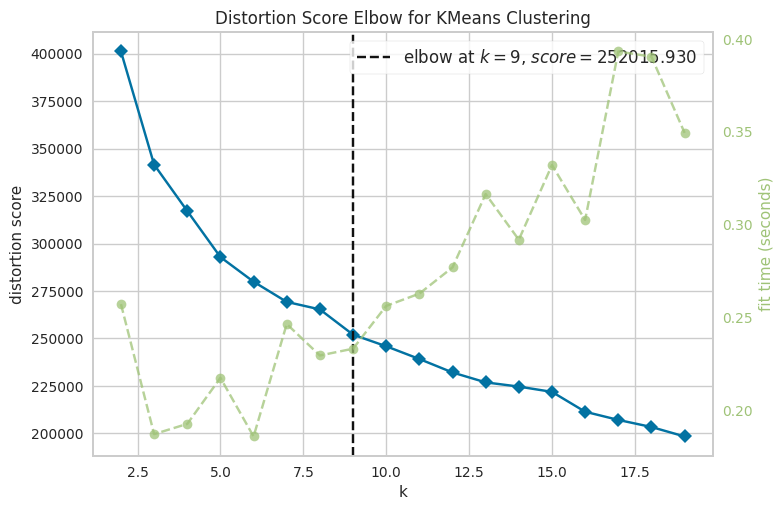

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

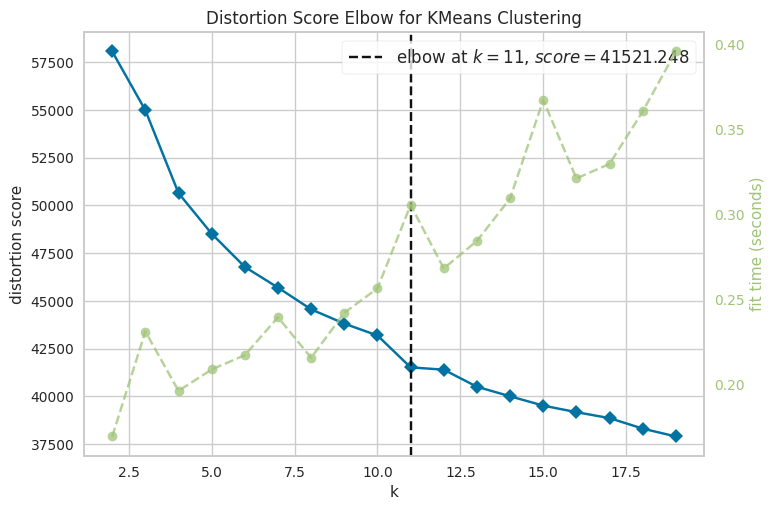

'\nPlease note: Using chem2_name (a modified form of Chemical_Names obtained using the advanced methods \ndeveloped in the 10_NB_Final_Chem2.ipynb notebook) instead of Chemical_Names as a Text Prompt will result in a \n"Distortion Score Elbow for KMeans Clustering" with k=8 and k=4 respectively.\n\n    #\'chem2_names\' is generated out of the notebook 06_nb_final_chem2.ipynb. After running this notebook, above text prompt can be used \n    #notebook 06_nb_final_chem2.ipynb creates a csv file \'04_nb_extract_chem2_name.csv\' which has chem2_names column.\n'

In [18]:
#Set font for the matplot lib to use the below defaulted fonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.sans-serif'] = ['Times New Roman']

from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,20))
visualizer.fit(embeddings)   # Fit the data for the Chemical names
visualizer.show()

km = KMeans(random_state=42) #Tried with these parameters init='k-means++', n_init='auto', but no improvement
visualizer = KElbowVisualizer(km, k=(2,20))
visualizer.fit(embeddings1)  # Fit the data for the text prompt using multiple values including the Chemical name
visualizer.show()

'''
Please note: Using chem2_name (a modified form of Chemical_Names obtained using the advanced methods 
developed in the 10_NB_Final_Chem2.ipynb notebook) instead of Chemical_Names as a Text Prompt will result in a 
"Distortion Score Elbow for KMeans Clustering" with k=8 and k=4 respectively.

    #'chem2_names' is generated out of the notebook 06_nb_final_chem2.ipynb. After running this notebook, above text prompt can be used 
    #notebook 06_nb_final_chem2.ipynb creates a csv file '04_nb_extract_chem2_name.csv' which has chem2_names column.
'''


In [19]:
# Perform K-means++ clustering
# Second step is to run K-means++ clusterization model using the k value determined in the above step

num_clusters = 8 # Define the number of clusters #num_samples=6
num_clusters = 9 # Define the number of clusters #num_samples=6 #June 2 2025
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', # algorithm='lloyd',
                random_state=0).fit(embeddings)

clusters8 = kmeans.fit_predict(embeddings)
#Changes for chemdataexplorer output Oct/23
#clusters6 = kmeans.fit_predict(embeddings)

num_clusters = 4  # Define the number of clusters #num_samples=6
num_clusters = 11  # Define the number of clusters #num_samples=6 #June 2 2025
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', # algorithm='lloyd',
                random_state=0).fit(embeddings1)

clusters4 = kmeans.fit_predict(embeddings1)
#Changes for chemdataexplorer output Oct/23
#clusters9 = kmeans.fit_predict(embeddings1)

#When comparing fit vs fit_predict in KMeans, remember that fit is used when you plan to fit a model that you'll use to make 
#predictions on new data later, while fit_predict is for when you want to fit to the data and also get cluster assignments 
#immediately, without the need for predicting on new data later.
#y_kmeans = kmeans.predict(X)

#df['clusters'] = kmeans.labels_
#df['clusters2'] = clusters

#Changes for chemdataexplorer output Oct/23
df['clusters8'] = clusters8
df['clusters4'] = clusters4
#df['clusters6'] = clusters6
#df['clusters9_adv'] = clusters9

In [20]:
# Print cluster assignments
for i, smi in enumerate(smiles_list):
    print(f"SMILES: {smi}, Cluster: {kmeans.labels_[i]}")
    if i>2:
        break;

print(i, " | ", len(embeddings)," | ", embeddings.shape, " | ", 
      kmeans.labels_.shape, " | ", df.shape, "| ", clusters8.shape, "| ", clusters4.shape)
#Changes for chemdataexplorer output Oct/23
#print(i, " | ", len(embeddings)," | ", embeddings.shape, " | ", 
#      kmeans.labels_.shape, " | ", df.shape, "| ", clusters6.shape, "| ", clusters9.shape)

SMILES: Descriptive Site Inspection : Pass/Fail 1/0, Cluster: 0
SMILES: Visible oil or grease, significant trace: Present/Not found (1/0), Cluster: 0
SMILES: BOD : 5 Day ATU, Cluster: 1
SMILES: Nitrogen, Cluster: 10
3  |  3261  |  (3261, 768)  |  (3261,)  |  (3261, 14) |  (3261,) |  (3261,)


In [22]:
# Save the clustered data
#Changes for chemdataexplorer output Oct/23
#df.to_csv('09_F_CSV_chemBERT3_Cluster.csv', index=True)
#savedata(df, "09_F_CSV_chemBERT3_Cluster.csv")
#df.to_csv('10_F_CSV_chem2_chemBERT_Cluster.csv', index=True) #Commented on 11 May 2025
#savedata(df, "10_F_CSV_chem2_chemBERT_Cluster.csv")          #Commented on 11 May 2025
if (filename == '04_nb_extract_chem_name.csv'):
    savedata(df, "05_nb_chem_cluster_llm.csv", tpath='gcs://rdmai_dev_data/')  #Added on 11 May 2025
    print(filename)
df.head(2)

saved, Location:  gcs://rdmai_dev_data/cleansed/05_nb_chem_cluster_llm.csv
04_nb_extract_chem_name.csv


,Unnamed: 0.1,Unnamed: 0,determinand_notation,determinand_name,determinand_definition,result,determinand_unit_name,samplingPoint_notation,samplingPoint_name,Chemical_Names,Chemical_Group,Metal,clusters8,clusters4
0,0,0,7444,D Site Insp,Descriptive Site Inspection : Pass/Fail 1/0,1.00,coded,AN-011262,STEANE PARK THE MANOR HOUSE STW,Descriptive Site Inspection : Pass/Fail 1/0,99,False,5,0
1,1,4,664,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",0.00,pres/nf,AN-011262,STEANE PARK THE MANOR HOUSE STW,"Visible oil or grease, significant trace: Pres...",99,False,5,0


In [23]:
from sklearn.manifold import TSNE

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

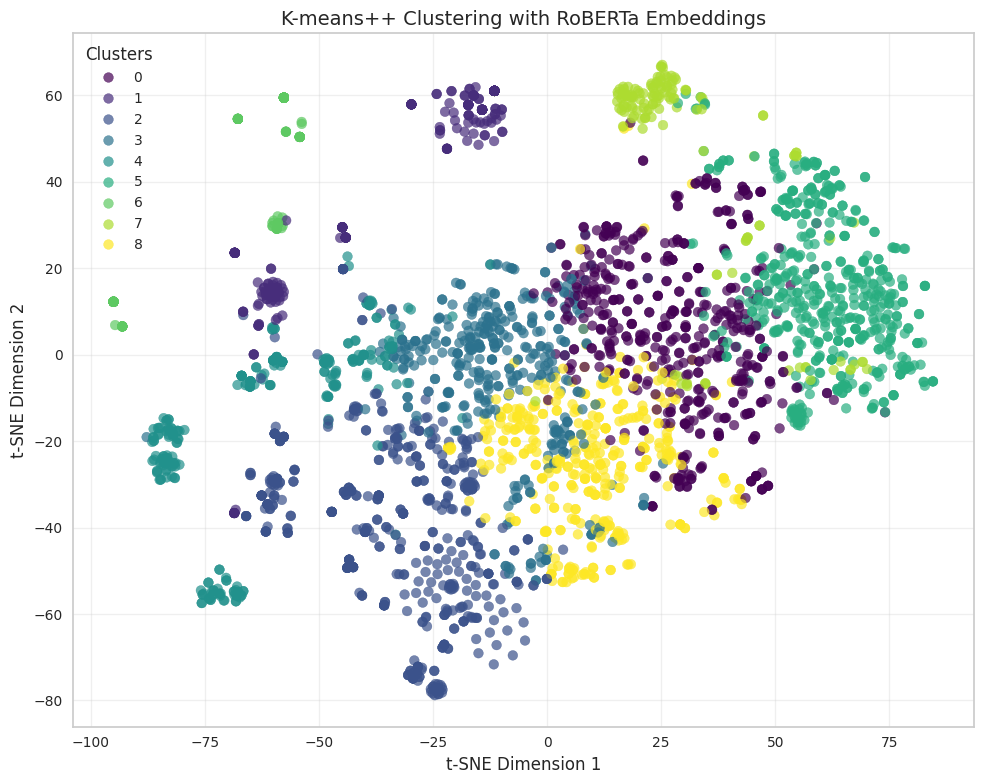

In [24]:
# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters8, cmap='viridis', alpha=0.7)

# Add cluster centers (in the reduced 2D space)
#centers_2d = tsne.fit_transform(kmeans.cluster_centers_)
#plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='x', s=100, linewidths=2)

# Add labels and title
plt.title('K-means++ Clustering with RoBERTa Embeddings', fontsize=14)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)

# Add legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Add text labels for some points (optional)
#for i, txt in enumerate(texts[:4]):  # Label first 4 points for example
#    plt.annotate(f"{i}", (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

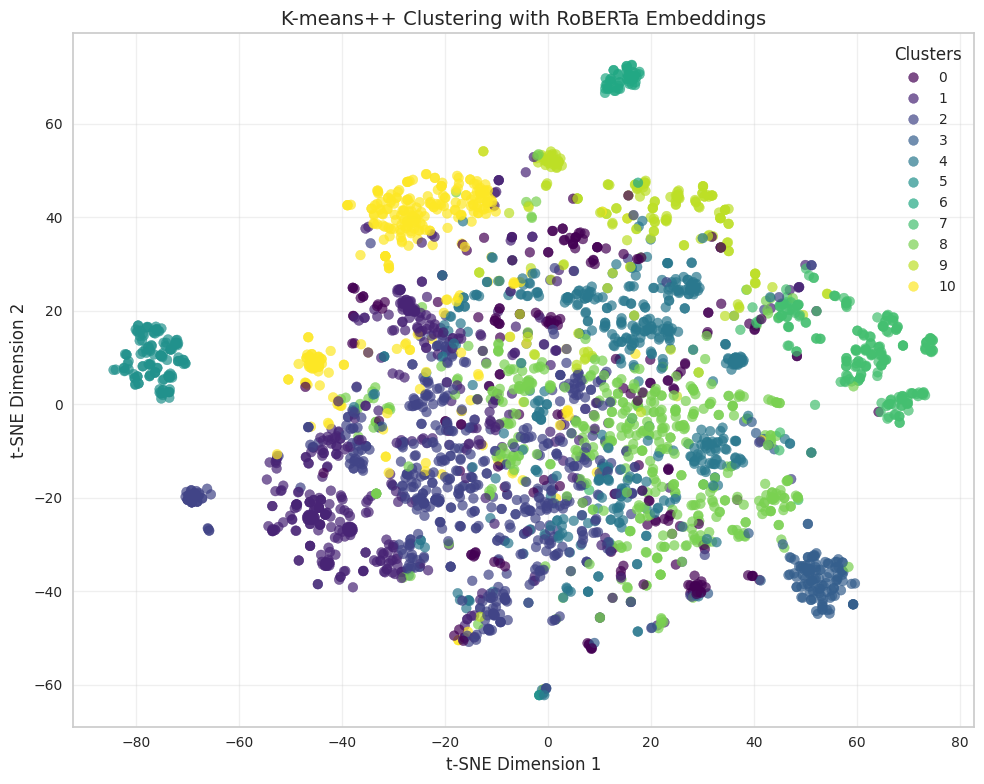

In [25]:
# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d1 = tsne.fit_transform(embeddings1)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d1[:, 0], embeddings_2d1[:, 1], c=clusters4, cmap='viridis', alpha=0.7)

# Add cluster centers (in the reduced 2D space)
#centers_2d1 = tsne.fit_transform(kmeans.cluster_centers_)
#plt.scatter(centers_2d1[:, 0], centers_2d1[:, 1], c='red', marker='x', s=100, linewidths=2)

# Add labels and title
plt.title('K-means++ Clustering with RoBERTa Embeddings', fontsize=14)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)

# Add legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Add text labels for some points (optional)
#for i, txt in enumerate(texts[:4]):  # Label first 4 points for example
#    plt.annotate(f"{i}", (embeddings_2d1[i, 0], embeddings_2d1[i, 1]))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
#dbutils.notebook.exit("End Workload - Scrip stopped")

In [27]:
#End CARD
#In line comments completed 11-May-2025